# Visualization 1: Matplotlib Basics

**Learning Objectives:** Learn how to make basic plots using Matplotlib and how to use the Matplotlib documentation.

## Imports

The following imports should be used in all of your notebooks where Matplotlib in used:

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

## Basic plotting

To start, we'll take a look at the most basic way to construct a scatter plot in Matplotlib. In the scatter method, the first input is the x-axis variable and the second input is the y-axis variable.

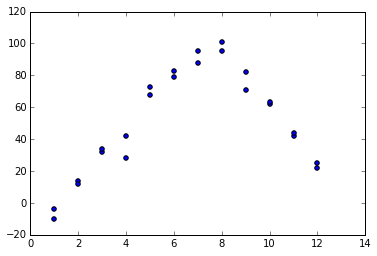

In [16]:
month = [1,1,2,2,3,3,4,4,5,5,6,6,7,7,8,8,9,9,10,10,11,11,12,12]
temp = [-10,-4,14,12,32,34,42,28,68,73,79,83,88,95,95,101,82,71,62,63,42,44,22,25]
plt.scatter(month, temp)
plt.show()
plt.clf()

DataFrame columns can also be used as inputs for scatter plots.

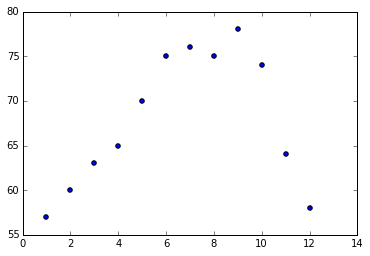

In [17]:
from pandas import DataFrame

mv_weather = {"month": [1,2,3,4,5,6,7,8,9,10,11,12],
              "average temp": [57, 60, 63, 65, 70, 75, 76, 75, 78, 74, 64, 58]}
frame = DataFrame(mv_weather)
plt.scatter(frame["month"], frame["average temp"])

You can also make the chart a line plot.

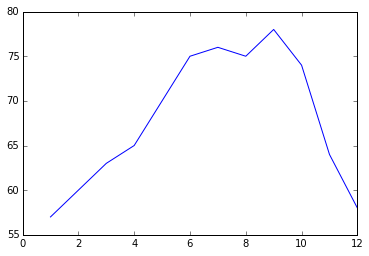

In [18]:
plt.plot(frame["month"], frame["average temp"])

Now, we will work with basic x, y plots to show in more detail how the Matplotlib plotting API works.

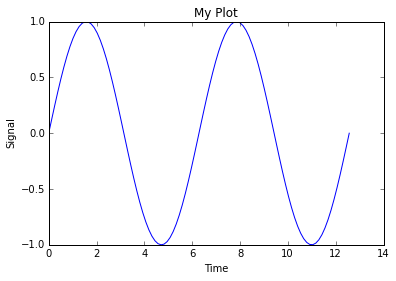

In [19]:
t = np.linspace(0,4*np.pi,100)
plt.plot(t, np.sin(t))
plt.xlabel('Time')
plt.ylabel('Signal')
plt.title('My Plot')

## Quick series styling

With a third argument you can provide the series color and line/marker style:

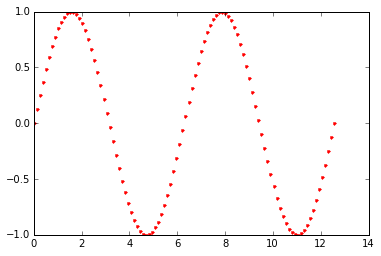

In [20]:
plt.plot(t, np.sin(t), 'r.')

Here is a list of the single character color strings:

```
    b: blue
    g: green
    r: red
    c: cyan
    m: magenta
    y: yellow
    k: black
    w: white
```

The following will show all of the line and marker styles:

In [21]:
from matplotlib import lines
lines.lineStyles.keys()

[u'', u' ', u'None', u'--', u'-.', u'-', u':']

In [22]:
from matplotlib import markers
markers.MarkerStyle.markers.keys()

[0,
 1,
 2,
 3,
 4,
 u'D',
 6,
 7,
 u's',
 u'|',
 u'',
 u'None',
 u'x',
 5,
 u'_',
 u'^',
 u' ',
 u'd',
 None,
 u'h',
 u'+',
 u'*',
 u',',
 u'o',
 u'.',
 u'1',
 u'p',
 u'3',
 u'2',
 u'4',
 u'H',
 u'v',
 u'8',
 u'<',
 u'>']

To change the plot's viewport, use `plt.axis([xmin,xmax,ymin,ymax])`:

[-1, 14, -1.5, 1.5]

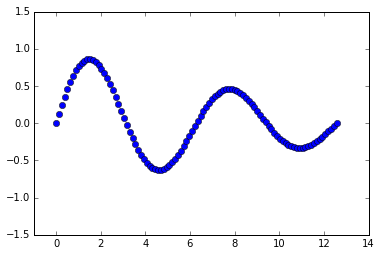

In [23]:
plt.plot(t, np.sin(t)*np.exp(-0.1*t),'bo')
plt.axis([-1,14,-1.5,1.5])

## Multiple series

You can provide multiple series in a single call to `plot`:

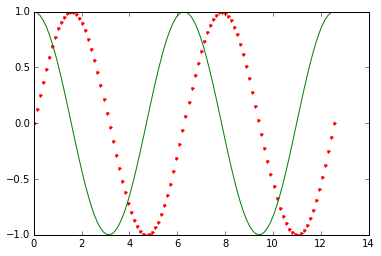

In [24]:
plt.plot(t, np.sin(t), 'r.', t, np.cos(t), 'g-')

Or you can make multiple calls to `plot`:

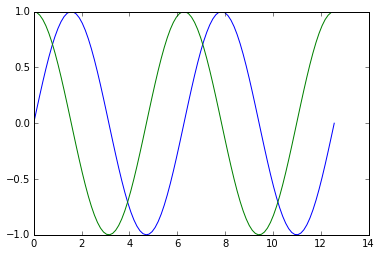

In [25]:
plt.plot(t, np.sin(t))
plt.plot(t, np.cos(t))

## Subplots

You can use the `subplot` function to create a grid of plots in a single figure.

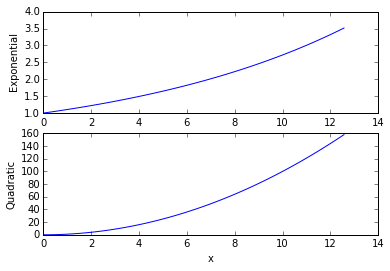

In [26]:
plt.subplot(2,1,1)
plt.plot(t, np.exp(0.1*t))
plt.ylabel('Exponential')
plt.subplot(2,1,2)
plt.plot(t, t**2)
plt.ylabel('Quadratic')
plt.xlabel('x')

## More line styling

All plot commands, including `plot`, accept keyword arguments that can be used to style the lines in more detail. See [Controlling line properties](http://matplotlib.org/users/pyplot_tutorial.html#controlling-line-properties) for more details:

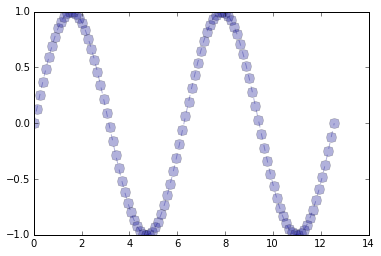

In [27]:
plt.plot(t, np.sin(t), marker='o', color='darkblue',
         linestyle='--', alpha=0.3, markersize=10)

## Other plot types

Here are some of the other important plot types we will be using in this course:

* Scatter plots (`plt.scatter`)
* Bar plots (`plt.bar` and `plt.barh`)
* Box plots (`plt.boxplot`)
* Histogram (`plt.hist`)

## Resources

* [Matplotlib Documentation](http://matplotlib.org/contents.html), Matplotlib developers.
* [Matplotlib Gallery](http://matplotlib.org/gallery.html), Matplotlib developers.
* [Matplotlib List of Plotting Commands](http://matplotlib.org/api/pyplot_summary.html), Matplotlib developers.
* [Matplotlib Tutorial](http://nbviewer.ipython.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-4-Matplotlib.ipynb), J.R. Johansson.